In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('COTS dataset.csv')

In [3]:
df.dtypes

City coffee shop    object
Year                 int64
Month                int64
Product category    object
Sales Volume        object
Sales Value         object
dtype: object

In [4]:
df

,City coffee shop,Year,Month,Product category,Sales Volume,Sales Value
0,Southampton,2020,1,Coffee,91,£364
1,Southampton,2020,1,Hot drinks,46,£92
2,Southampton,2020,1,Cold drinks,60,£150
3,Southampton,2020,1,Cakes,23,£115
4,Southampton,2020,1,Sandwiches,19,£114
...,...,...,...,...,...,...
643,Blackpool,2022,12,Hot drinks,158,£317
644,Blackpool,2022,12,Cold drinks,215,£539
645,Blackpool,2022,12,Cakes,92,£458
646,Blackpool,2022,12,Sandwiches,55,£327


# Clean Data

In [5]:
df['Sales Value'] = df['Sales Value'].str.replace('£', '')

In [6]:
df['Sales Value'] = df['Sales Value'].str.replace(',', '')

In [7]:
df['Sales Value'] = df['Sales Value'].str.replace('-', '0')


In [8]:
df['Sales Volume'] = df['Sales Volume'].str.replace('-', '0')

In [9]:
df['Sales Value']=df['Sales Value'].astype(int)

In [10]:
df['Sales Volume']=df['Sales Volume'].astype(int)

In [11]:
df['Product category'].replace('Kakes', 'Cakes', inplace=True)

In [12]:
df['City coffee shop'].replace('Southam', 'Southampton', inplace=True)

In [13]:
df['Product category'].replace('Colddrinks', 'Cold drinks', inplace=True)

In [14]:
df['Product category'].replace('Pazztry', 'Pastry', inplace=True)

In [15]:
df['Product category'].replace('Sandwich', 'Sandwiches', inplace=True)

In [16]:
df['Year'].replace(2032, 2022, inplace=True)

In [17]:
df['Sales Volume']=df['Sales Volume'].fillna(df['Sales Volume'].mean())

In [18]:
df.dtypes

City coffee shop    object
Year                 int64
Month                int64
Product category    object
Sales Volume         int32
Sales Value          int32
dtype: object

In [19]:
pd.set_option('display.max_rows', None)      # Display all rows
pd.set_option('display.max_columns', None)   # Display all columns
pd.set_option('display.max_colwidth', None)  # Display full content of cells without truncation

# Display the DataFrame without truncation
print(df)

    City coffee shop  Year  Month Product category  Sales Volume  Sales Value
0        Southampton  2020      1           Coffee            91          364
1        Southampton  2020      1       Hot drinks            46           92
2        Southampton  2020      1      Cold drinks            60          150
3        Southampton  2020      1            Cakes            23          115
4        Southampton  2020      1       Sandwiches            19          114
5        Southampton  2020      1           Pastry            58          116
6        Southampton  2020      2           Coffee            99          396
7        Southampton  2020      2       Hot drinks             0            0
8        Southampton  2020      2      Cold drinks            55          138
9        Southampton  2020      2            Cakes            27          135
10       Southampton  2020      2       Sandwiches            17          102
11       Southampton  2020      2           Pastry            65

In [20]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.max_colwidth')

# Table A

### Sales Value and Sales Volume by Month

In [21]:
monthly_data = df.groupby(['Month'])[['Sales Volume', 'Sales Value']].sum().reset_index()

In [22]:
monthly_data

,Month,Sales Volume,Sales Value
0,1,3841,12432
1,2,4187,13549
2,3,4706,15189
3,4,5669,18673
4,5,4653,15310
5,6,5124,16256
6,7,5644,18273
7,8,6168,19843
8,9,4983,15962
9,10,5070,16225


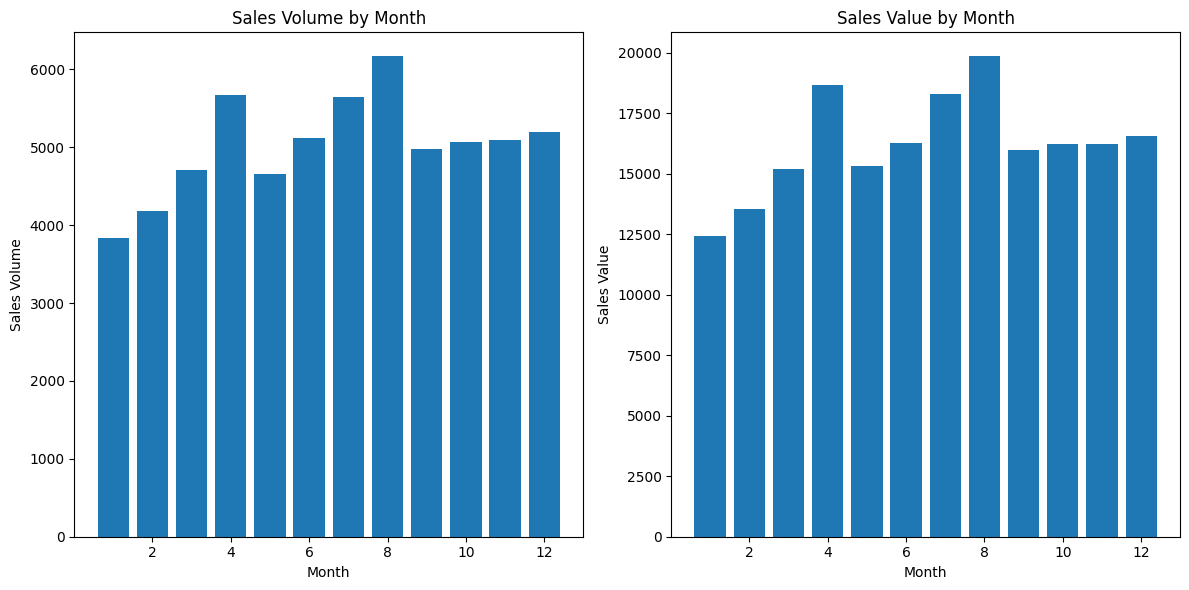

'"COTS dataset.csv"\n# Create the figure and subplots\nplt.figure(figsize=(12, 6))\nplt.subplot(1, 2, 1)\nax1 = plt.bar(monthly_data[\'Month\'], monthly_data[\'Sales Volume\'])\nplt.title(\'Sales Volume by Month\')\nplt.xlabel(\'Month\')\nplt.ylabel(\'Sales Volume\')\n\n# Add exact values above the bars in the first subplot\nfor bar in ax1:\n    height = bar.get_height()\n    plt.annotate(f\'{height}\', xy=(bar.get_x() + bar.get_width() / 2, height),\n                 xytext=(0, 3),  # 3 points vertical offset\n                 textcoords="offset points",\n                 ha=\'center\', va=\'bottom\')\n\nplt.subplot(1, 2, 2)\nax2 = plt.bar(monthly_data[\'Month\'], monthly_data[\'Sales Value\'])\nplt.title(\'Sales Value by Month\')\nplt.xlabel(\'Month\')\nplt.ylabel(\'Sales Value\')\n\n# Add exact values above the bars in the second subplot\nfor bar in ax2:\n    height = bar.get_height()\n    plt.annotate(f\'{height}\', xy=(bar.get_x() + bar.get_width() / 2, height),\n                 

In [23]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(monthly_data['Month'], monthly_data['Sales Volume'])
plt.title('Sales Volume by Month')
plt.xlabel('Month')
plt.ylabel('Sales Volume')

plt.subplot(1, 2, 2)
plt.bar(monthly_data['Month'], monthly_data['Sales Value'])
plt.title('Sales Value by Month')
plt.xlabel('Month')
plt.ylabel('Sales Value')

plt.tight_layout()
plt.show()

'''"COTS dataset.csv"
# Create the figure and subplots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
ax1 = plt.bar(monthly_data['Month'], monthly_data['Sales Volume'])
plt.title('Sales Volume by Month')
plt.xlabel('Month')
plt.ylabel('Sales Volume')

# Add exact values above the bars in the first subplot
for bar in ax1:
    height = bar.get_height()
    plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.subplot(1, 2, 2)
ax2 = plt.bar(monthly_data['Month'], monthly_data['Sales Value'])
plt.title('Sales Value by Month')
plt.xlabel('Month')
plt.ylabel('Sales Value')

# Add exact values above the bars in the second subplot
for bar in ax2:
    height = bar.get_height()
    plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()
'''

### Sales Value and Sales Volume by Year

In [24]:
yearly_data = df.groupby('Year')[['Sales Volume', 'Sales Value']].sum().reset_index()


In [25]:
yearly_data

,Year,Sales Volume,Sales Value
0,2020,18649,60518
1,2021,19697,63814
2,2022,21989,70155


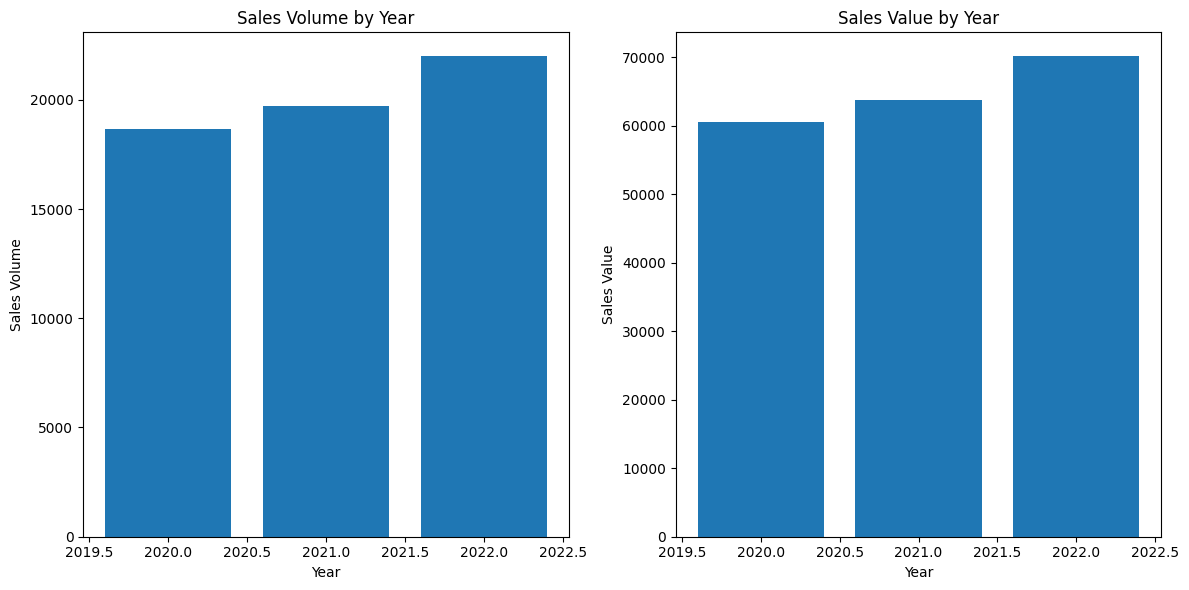

In [26]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(yearly_data['Year'], yearly_data['Sales Volume'])
plt.title('Sales Volume by Year')
plt.xlabel('Year')
plt.ylabel('Sales Volume')

plt.subplot(1, 2, 2)
plt.bar(yearly_data['Year'], yearly_data['Sales Value'])
plt.title('Sales Value by Year')
plt.xlabel('Year')
plt.ylabel('Sales Value')

plt.tight_layout()
plt.show()

### Sales Value and Sales Volume Across 3 Years

In [27]:
over_years = df[['Sales Volume', 'Sales Value']].sum().reset_index()

In [28]:
over_years

,index,0
0,Sales Volume,60335
1,Sales Value,194487


In [29]:
type(over_years)

pandas.core.frame.DataFrame

In [30]:
data = dict()
data[over_years['index'][0]]=over_years[0][0]
data[over_years['index'][1]]=over_years[0][1]

In [31]:
data

{'Sales Volume': 60335, 'Sales Value': 194487}

In [32]:
df2 = pd.DataFrame(data, index=[0])

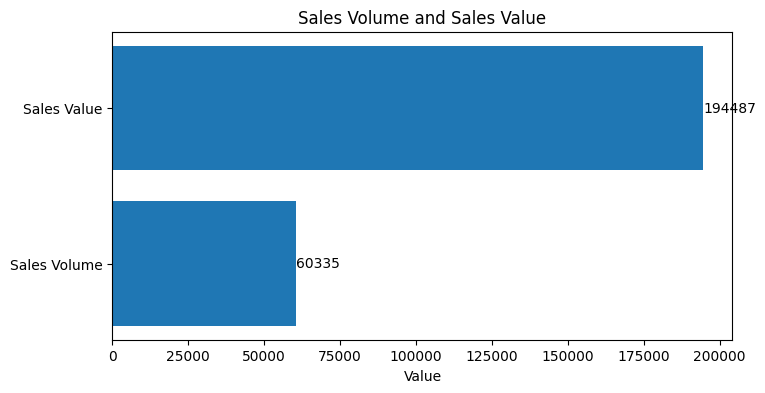

In [33]:


# Create a horizontal bar plot for the data
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(df2.columns, df2.iloc[0])
ax.set_title('Sales Volume and Sales Value')
ax.set_xlabel('Value')

# Add exact values next to the bars
for y, x in enumerate(df2.iloc[0]):
    ax.text(x, y, str(x), ha='left', va='center')

plt.show()

# Table B

### By Quater

In [34]:
df['Quarter'] = (df['Month'] - 1) // 3 + 1

In [35]:
# Group by Quarter and Product category
quarterly_data = df.groupby(['Quarter', 'Product category'])[['Sales Volume', 'Sales Value']].sum().reset_index()

In [36]:
quarterly_data.sort_values(by='Quarter', ascending=True)

,Quarter,Product category,Sales Volume,Sales Value
0,1,Cakes,1184,5910
1,1,Coffee,3925,15694
2,1,Cold drinks,2559,6390
3,1,Hot drinks,1835,3667
4,1,Pastry,2463,4922
5,1,Sandwiches,768,4587
10,2,Pastry,3086,6509
9,2,Hot drinks,2330,4657
11,2,Sandwiches,901,5392
7,2,Coffee,4688,18749


In [37]:
# Pivot table for sales volume
volume_pivot = quarterly_data.pivot_table(index='Product category', columns=['Quarter'], values='Sales Volume', fill_value=0)

In [38]:
#volume_pivot

In [39]:
# Pivot table for sales value
value_pivot = quarterly_data.pivot_table(index='Product category', columns=['Quarter'], values='Sales Value', fill_value=0)

In [40]:
#value_pivot

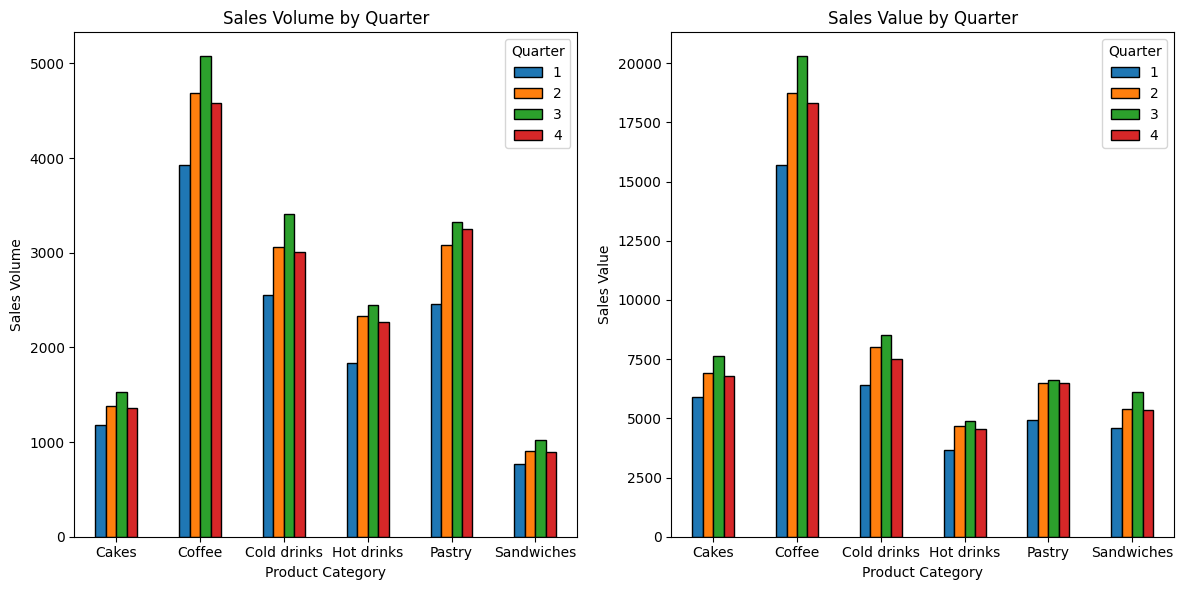

In [41]:
# Create the side-by-side bar plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot Sales Volume comparison
volume_pivot.plot(kind='bar', ax=ax[0], rot=0, edgecolor='black')
ax[0].set_title('Sales Volume by Quarter')
ax[0].set_xlabel('Product Category')
ax[0].set_ylabel('Sales Volume')

# Plot Sales Value comparison
value_pivot.plot(kind='bar', ax=ax[1], rot=0, edgecolor='black')
ax[1].set_title('Sales Value by Quarter')
ax[1].set_xlabel('Product Category')
ax[1].set_ylabel('Sales Value')

plt.tight_layout()
plt.show()

### By Year

In [42]:
# Group by Quarter and Product category
yearly_data = df.groupby(['Year', 'Product category'])[['Sales Volume', 'Sales Value']].sum().reset_index()

In [43]:
yearly_data.sort_values(by='Year', ascending=True)

,Year,Product category,Sales Volume,Sales Value
0,2020,Cakes,1721,8595
1,2020,Coffee,5723,22878
2,2020,Cold drinks,3685,9209
3,2020,Hot drinks,2740,5476
4,2020,Pastry,3659,7655
5,2020,Sandwiches,1121,6705
11,2021,Sandwiches,1180,7062
10,2021,Pastry,3866,7725
9,2021,Hot drinks,2943,5882
8,2021,Cold drinks,3882,10085


In [44]:
# Pivot table for sales volume
volume_pivot = yearly_data.pivot_table(index='Product category', columns=['Year'], values='Sales Volume', fill_value=0)

In [45]:
# Pivot table for sales value
value_pivot = yearly_data.pivot_table(index='Product category', columns=['Year'], values='Sales Value', fill_value=0)

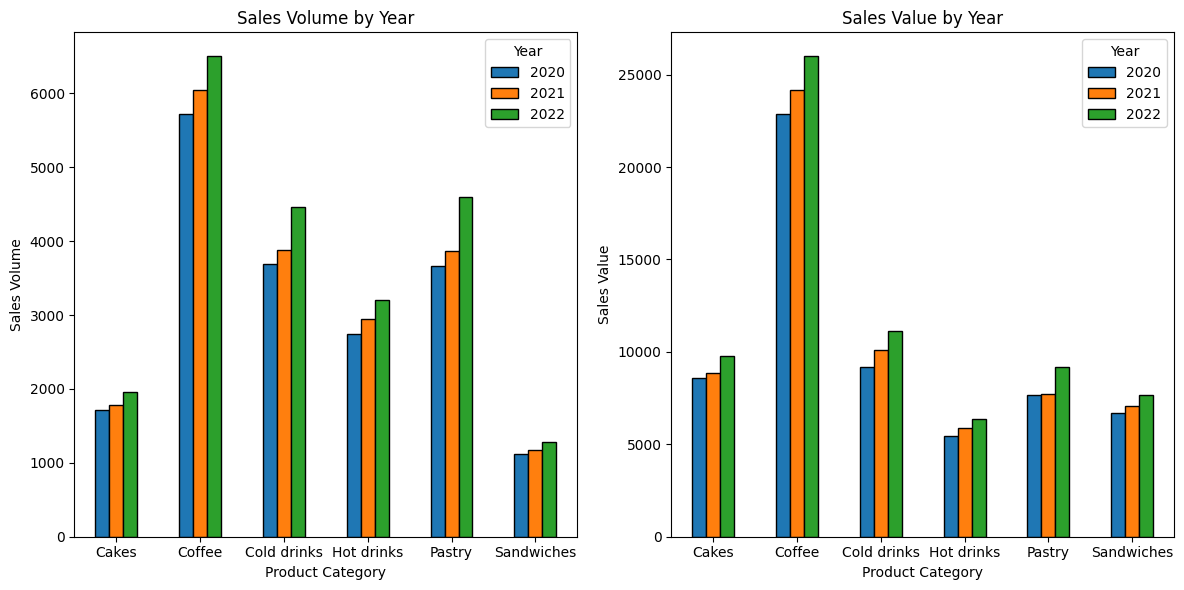

In [46]:
# Create the side-by-side bar plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot Sales Volume comparison
volume_pivot.plot(kind='bar', ax=ax[0], rot=0, edgecolor='black')
ax[0].set_title('Sales Volume by Year')
ax[0].set_xlabel('Product Category')
ax[0].set_ylabel('Sales Volume')

# Plot Sales Value comparison
value_pivot.plot(kind='bar', ax=ax[1], rot=0, edgecolor='black')
ax[1].set_title('Sales Value by Year')
ax[1].set_xlabel('Product Category')
ax[1].set_ylabel('Sales Value')

plt.tight_layout()
plt.show()

### Across 3 Years

In [47]:
# Group by Year and Product category
year3_data = df.groupby(['Product category'])[['Sales Volume', 'Sales Value']].sum().reset_index()


In [48]:
year3_data

,Product category,Sales Volume,Sales Value
0,Cakes,5458,27260
1,Coffee,18271,73050
2,Cold drinks,12024,30431
3,Hot drinks,8880,17744
4,Pastry,12118,24560
5,Sandwiches,3584,21442


In [49]:
# Pivot table for sales volume
volume_pivot = year3_data.pivot_table(index='Product category', values='Sales Volume', fill_value=0)


In [50]:
# Pivot table for sales value
value_pivot = year3_data.pivot_table(index='Product category', values='Sales Value', fill_value=0)


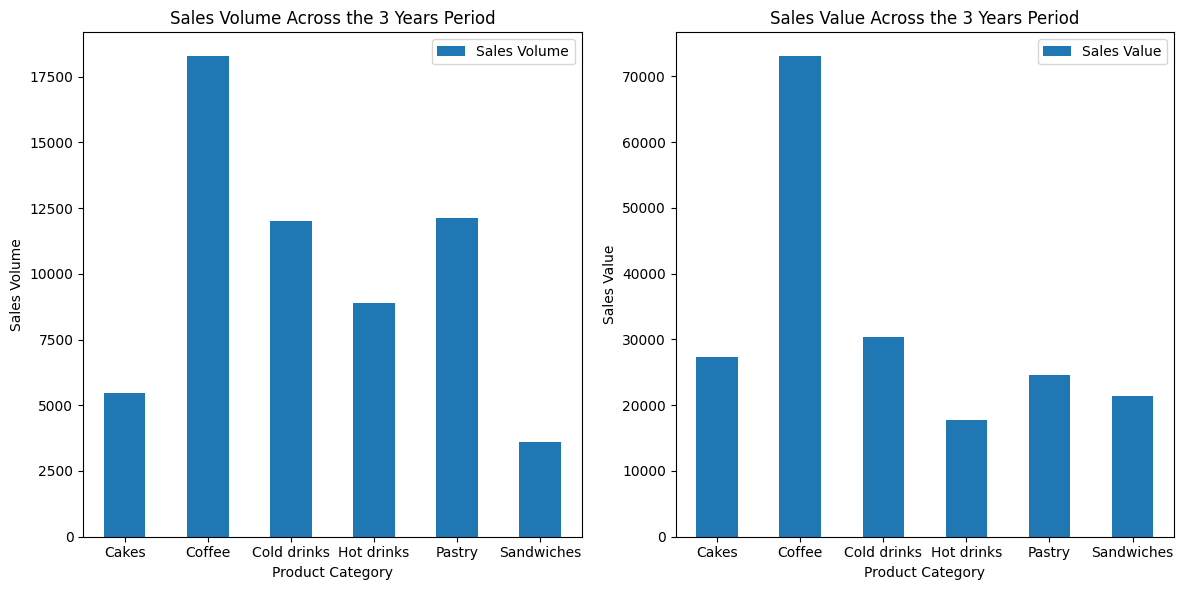

In [51]:
# Create bar plots for sales volume and value
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot Sales Volume
volume_pivot.plot(kind='bar', ax=axes[0], rot=0)
axes[0].set_title('Sales Volume Across the 3 Years Period')
axes[0].set_xlabel('Product Category')
axes[0].set_ylabel('Sales Volume')

# Plot Sales Value
value_pivot.plot(kind='bar', ax=axes[1], rot=0)
axes[1].set_title('Sales Value Across the 3 Years Period')
axes[1].set_xlabel('Product Category')
axes[1].set_ylabel('Sales Value')

plt.tight_layout()
plt.show()

# Table C

### By Quater

In [52]:
quarterly_data = df.groupby(['Quarter', 'City coffee shop'])[['Sales Volume', 'Sales Value']].sum().reset_index()

In [53]:
quarterly_data

,Quarter,City coffee shop,Sales Volume,Sales Value
0,1,Blackpool,5748,18502
1,1,Portsmouth,4071,13249
2,1,Southampton,2915,9419
3,2,Blackpool,6756,22739
4,2,Portsmouth,5169,16314
5,2,Southampton,3521,11186
6,3,Blackpool,7839,25115
7,3,Portsmouth,5373,17279
8,3,Southampton,3583,11684
9,4,Blackpool,7175,22884


In [54]:
# Pivot table for sales value
value_pivot = quarterly_data.pivot_table(index='City coffee shop', columns=['Quarter'], values='Sales Value', fill_value=0)

In [55]:
# Pivot table for sales value
volume_pivot = quarterly_data.pivot_table(index='City coffee shop', columns=['Quarter'], values='Sales Volume', fill_value=0)

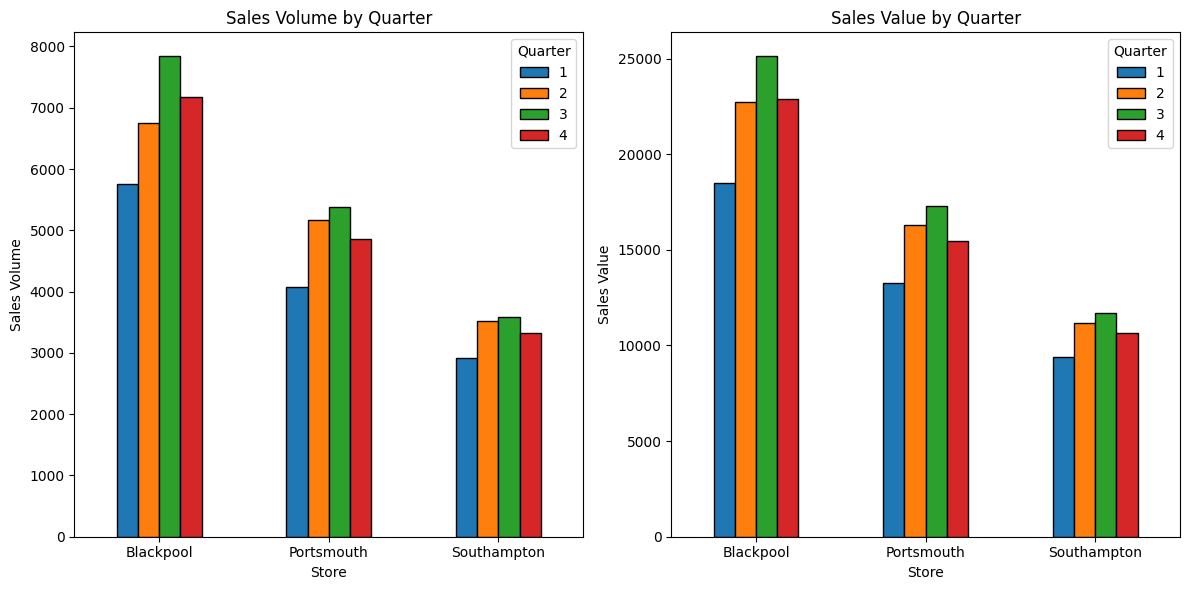

In [56]:
# Create the side-by-side bar plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot Sales Volume comparison
volume_pivot.plot(kind='bar', ax=ax[0], rot=0, edgecolor='black')
ax[0].set_title('Sales Volume by Quarter')
ax[0].set_xlabel('Store')
ax[0].set_ylabel('Sales Volume')

# Plot Sales Value comparison
value_pivot.plot(kind='bar', ax=ax[1], rot=0, edgecolor='black')
ax[1].set_title('Sales Value by Quarter')
ax[1].set_xlabel('Store')
ax[1].set_ylabel('Sales Value')

plt.tight_layout()
plt.show()

### By Year

In [57]:
yearly_data = df.groupby(['Year', 'City coffee shop'])[['Sales Volume', 'Sales Value']].sum().reset_index()

In [58]:
yearly_data

,Year,City coffee shop,Sales Volume,Sales Value
0,2020,Blackpool,8317,27252
1,2020,Portsmouth,6094,19568
2,2020,Southampton,4238,13698
3,2021,Blackpool,8755,28601
4,2021,Portsmouth,6508,20837
5,2021,Southampton,4434,14376
6,2022,Blackpool,10446,33387
7,2022,Portsmouth,6877,21879
8,2022,Southampton,4666,14889


In [59]:
# Pivot table for sales value
value_pivot = yearly_data.pivot_table(index='City coffee shop', columns=['Year'], values='Sales Value', fill_value=0)

In [60]:
# Pivot table for sales value
volume_pivot = yearly_data.pivot_table(index='City coffee shop', columns=['Year'], values='Sales Volume', fill_value=0)

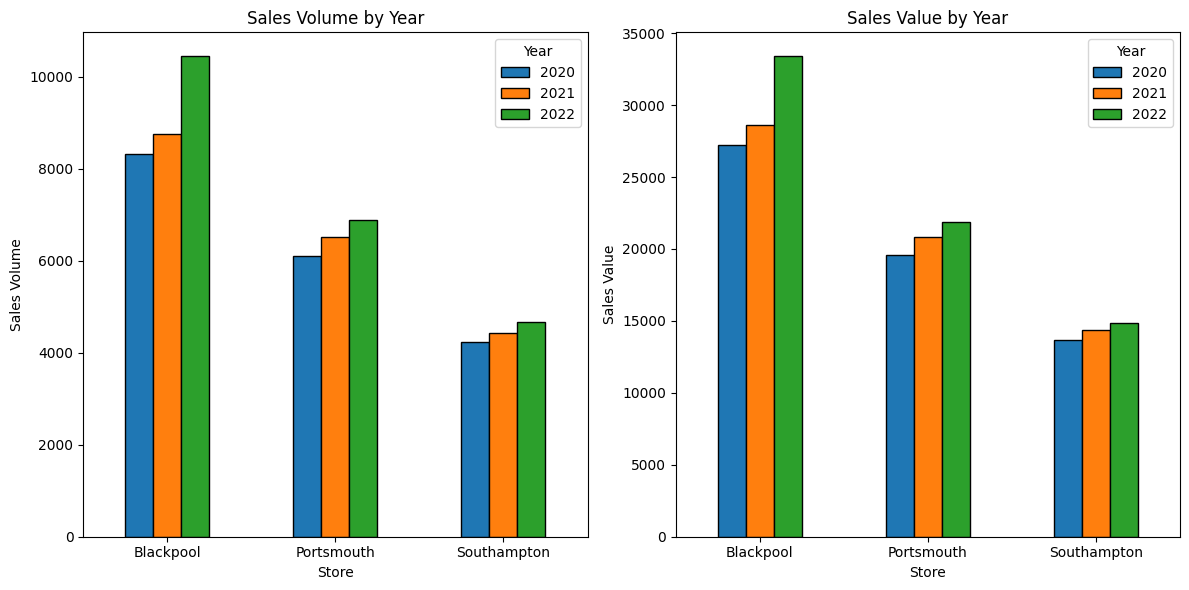

In [61]:
# Create the side-by-side bar plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot Sales Volume comparison
volume_pivot.plot(kind='bar', ax=ax[0], rot=0, edgecolor='black')
ax[0].set_title('Sales Volume by Year')
ax[0].set_xlabel('Store')
ax[0].set_ylabel('Sales Volume')

# Plot Sales Value comparison
value_pivot.plot(kind='bar', ax=ax[1], rot=0, edgecolor='black')
ax[1].set_title('Sales Value by Year')
ax[1].set_xlabel('Store')
ax[1].set_ylabel('Sales Value')

plt.tight_layout()
plt.show()

### Across 3 Years

In [62]:
# Group by Year and Product category
year3_data = df.groupby(['City coffee shop'])[['Sales Volume', 'Sales Value']].sum().reset_index()

In [63]:
year3_data

,City coffee shop,Sales Volume,Sales Value
0,Blackpool,27518,89240
1,Portsmouth,19479,62284
2,Southampton,13338,42963


In [64]:
# Pivot table for sales volume
volume_pivot = year3_data.pivot_table(index='City coffee shop', values='Sales Volume', fill_value=0)

In [65]:
# Pivot table for sales value
value_pivot = year3_data.pivot_table(index='City coffee shop', values='Sales Value', fill_value=0)

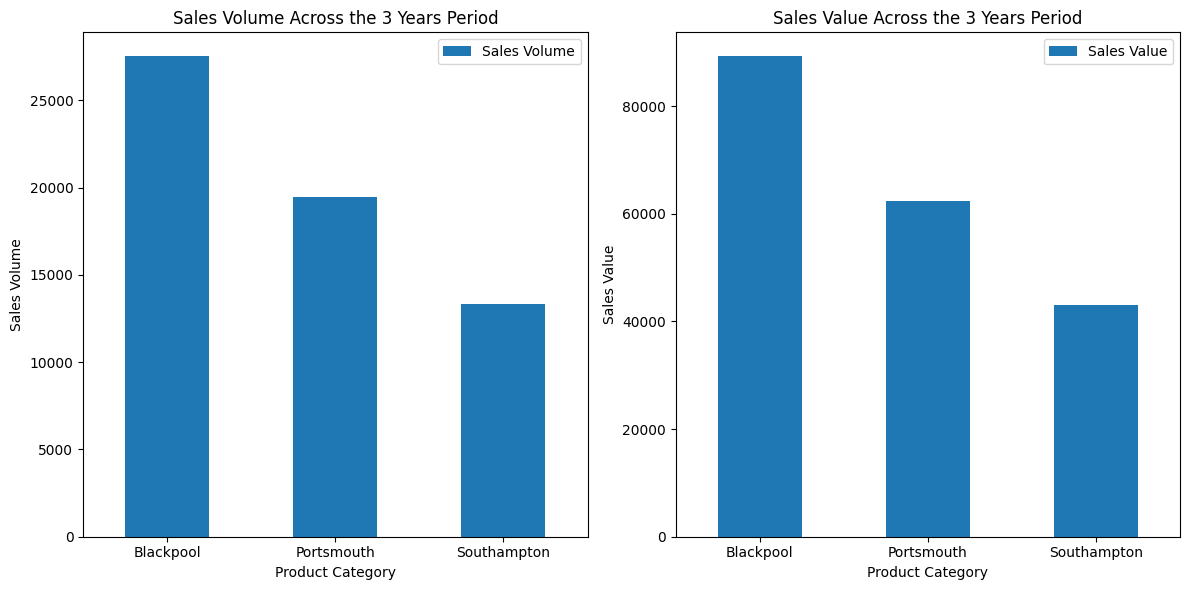

In [66]:
# Create bar plots for sales volume and value
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot Sales Volume
volume_pivot.plot(kind='bar', ax=axes[0], rot=0)
axes[0].set_title('Sales Volume Across the 3 Years Period')
axes[0].set_xlabel('Product Category')
axes[0].set_ylabel('Sales Volume')

# Plot Sales Value
value_pivot.plot(kind='bar', ax=axes[1], rot=0)
axes[1].set_title('Sales Value Across the 3 Years Period')
axes[1].set_xlabel('Product Category')
axes[1].set_ylabel('Sales Value')

plt.tight_layout()
plt.show()